Landsat code


In [1]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline
#import bands as separate 1 band raster
imagePath = 'jaipur_2/L1C_T43REK_A028016_20220718T054109/S2B_MSIL1C_20220718T052649_N0400_R105_T43REK_20220718T072828.SAFE/GRANULE/L1C_T43REK_A028016_20220718T054109/IMG_DATA/'
band2 = rasterio.open(imagePath+'T43REK_20220718T052649_B02.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath+'T43REK_20220718T052649_B03.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath+'T43REK_20220718T052649_B04.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath+'T43REK_20220718T052649_B08.jp2', driver='JP2OpenJPEG') #nir

1


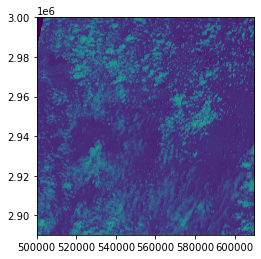

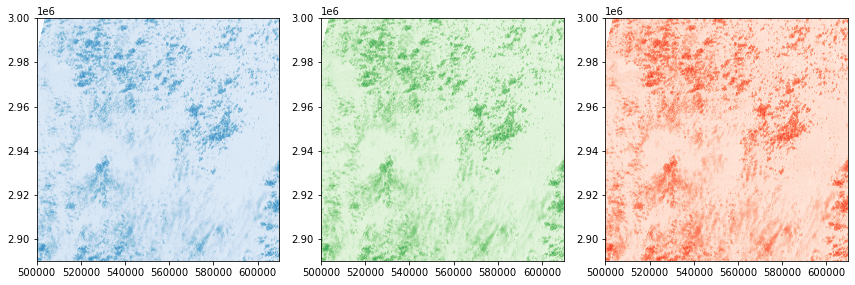

In [2]:
#number of raster bands
band4.count
print(band4.count)
#number of raster columns
band4.width
#number of raster rows
band4.height
#plot band 
plot.show(band4)
#type of raster byte
band4.dtypes[0]
#raster sytem of reference
band4.crs
#raster transform parameters
band4.transform
#raster values as matrix array
band4.read(1)
#multiple band representation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

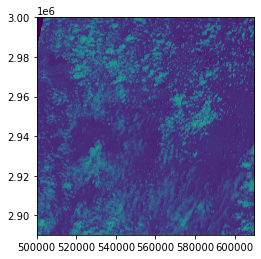

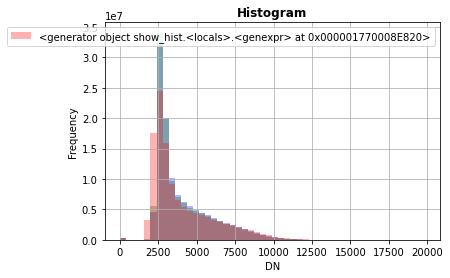

In [3]:
#export true color image
trueColor = rasterio.open('SentinelTrueColor2.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()
src = rasterio.open(r"SentinelTrueColor2.tiff", count=3)
plot.show(src)

#export false color image
falseColor = rasterio.open('SentinelFalseColor.tiff', 'w', driver='Gtiff',
                          width=band2.width, height=band2.height,
                          count=3,
                          crs=band2.crs,
                          transform=band2.transform,
                          dtype='uint16'                   
                         )
falseColor.write(band3.read(1),3) #Blue
falseColor.write(band4.read(1),2) #Green
falseColor.write(band8.read(1),1) #Red
falseColor.close()
#generate histogram
trueColor = rasterio.open('SentinelTrueColor2.tiff')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")